# Before putting on website change all "C:/Users/zeinab" to desire_path

# This code generates three different synthesized 16-channel dataset

Parameters that can be changed for producing various multielectrode dataset and do more testing:

- Spike shapes: using other waveforms for the spikes of the dataset
- Firing rates (fr): increasing or decreasing the firing rate of cells
- Distance coefficient (alpha): changing the distance coefficient to consider different situations
- Distance between recording sites (ch_pos): to produce data from denser electrodes or make other MEA structures
- Location of the cells (cell_pos): to observe the effect of distance between cells
- Number of cells (cells_num) or number of multielectrode channels (ch_num)

In [1]:
from numpy import apply_along_axis as apply
from scipy.signal import fftconvolve
from numpy.linalg import svd
from scipy import signal
from Pulse_func import produce_pulses
from Pulse_func import produce_pulses

import numpy as np
import pywt
import matplotlib.pyplot as plt
import random
import scipy
import struct

#np.set_printoptions(threshold='nan')#this is for showing all the elements of the array

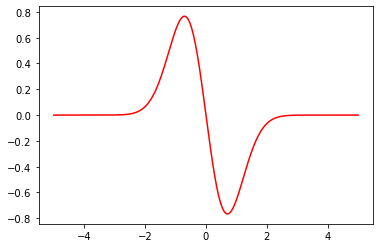

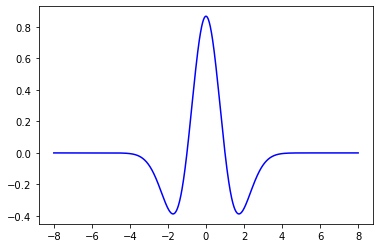

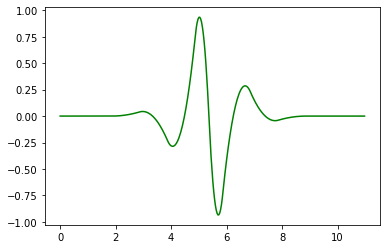

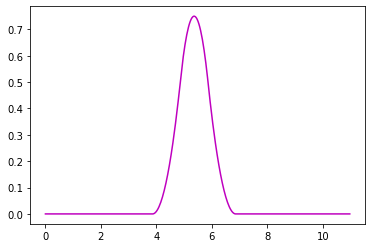

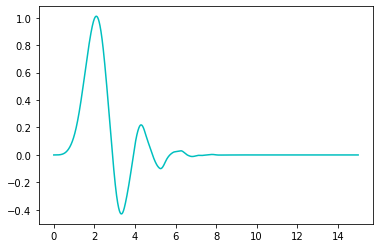

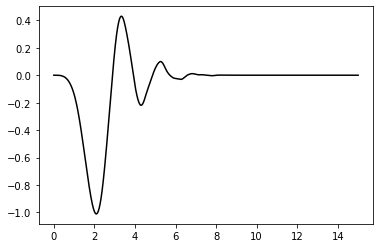

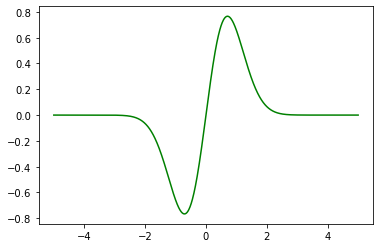

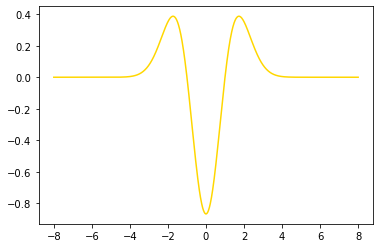

In [2]:
############ using wavelet signals for spikes samples ##########

#################  Gaussian wavelets ####################
wavelet = pywt.ContinuousWavelet('gaus1')
psi1, x1 = wavelet.wavefun(level=10)
fig, ax = plt.subplots()
#ax.set_xlim(-.02,1.02)
ax.plot(x1, psi1, c='r'); 

#################  Mexican hat wavelet ####################
wavelet = pywt.ContinuousWavelet('mexh')
psi2, x2 = wavelet.wavefun(level=10)
fig, ax = plt.subplots()
#ax.set_xlim(-.02,1.02)
ax.plot(x2, psi2, c='b');

################# Biorthogonal wavelet ####################
wavelet = pywt.Wavelet('bior3.5')
phi_d3, psi_d3, phi_r3, psi_r3, x3 = wavelet.wavefun(level=5)
fig, ax = plt.subplots()
plt.plot(x3,psi_r3, c='g');

fig, ax = plt.subplots()
plt.plot(x3,phi_r3, c='m');

#################  Debauchies wavelets ####################
#plot other wavelet waves
db8 = pywt.Wavelet('db8') #symmetric Debauchies wavelet with N=8.
scaling4, wavelet4, x4 = db8.wavefun()
fig, ax = plt.subplots()
plt.plot(x4, scaling4, c='c')

# fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8,6))
# ax1, ax2 = axes

# ax1.plot(x, scaling);
# ax1.set_title('Scaling function, N=8');
# ax1.set_ylim(-1.2, 1.2);

# ax2.set_title('Wavelet, N=8');
# ax2.tick_params(labelleft=False);
# ax2.plot(x-x.mean(), wavelet);

# fig.tight_layout()

#below samples can be used for more spiking groups if needed
############################# inverse Debauchies ##############
inv_sc = -scaling4
fig, ax = plt.subplots()
plt.plot(x4,inv_sc, c='black');

############################# inverse Gaussian ##############
inv_gaus = -psi1
fig, ax = plt.subplots()
plt.plot(x1, inv_gaus, c='green');

############################# inverse Mexican hat ##############
inv_mex = -psi2
fig, ax = plt.subplots()
plt.plot(x2,inv_mex, c='gold');

plt.show()

In [3]:
###########  generating spikes ############

### first makeing a poisson generator
total_length = 2
time_interval = 1e-3


#It should be considered that here, main channels are the nearest ones to the cells. So main channels are: ch1, ch4, ch6, ch8, ch10, ch12, ch14, ch16
#after that for other channels I can sum these channels together
nvar = 0.02 #variance of noise
alpha = 0.23 #0.23 is for the distance coefficient 1/4𝜋σ 

###################################### making first ch1 data (upper one)############################
fr = 201.0 #### firing rate for cell1
pulses = produce_pulses(fr, total_length, time_interval) #poisson generator
# fig, ax = plt.subplots()
# # plt.plot(pulses)
# # plt.title('poision generator')
# # plt.draw

### inserting spikes in the poisson sequences and adding Noise
sig1 = psi1[::16] #downsample with size 16 to have all signals with the shape of 64
ch1 = np.zeros((1, (pulses.shape[0]*sig1.shape[0])))
for i in range(pulses.shape[0]):
    if pulses[i] == 1:
        ch1[0,(i*sig1.shape[0]):((i+1)*sig1.shape[0])] = alpha*sig1 #0.23 is for the distance coefficient 1/4𝜋σ 
noise = np.random.normal(0,nvar,ch1.shape[1])
ch1n = ch1+noise

###################################### making ch4 data  ###########################################
## for the same-time (same firing rates) data I should comment (deactive) below  5 lines (poission generator)
fr = 103.0 #### for cell2
pulses = produce_pulses(fr, total_length, time_interval)
# fig, ax = plt.subplots()
# plt.plot(pulses)
# plt.title('poision generator')
# plt.draw

### inserting spikes in the poisson sequences
sig4 = psi2[::16] #to make cells with similar waveforms, change this line to psi1[::16] (normal: psi2[::16])
ch4 = np.zeros((1, (pulses.shape[0]*sig4.shape[0])))
for i in range(pulses.shape[0]):
    if pulses[i] == 1:
        ch4[0,(i*sig4.shape[0]):((i+1)*sig4.shape[0])] = alpha*sig4
noise = np.random.normal(0,nvar,ch4.shape[1])
ch4n = ch4+noise


###################################### making ch6 data ###########################################
fr = 178 #### for cell3
pulses = produce_pulses(fr, total_length, time_interval)
# fig, ax = plt.subplots()
# plt.plot(pulses)
# plt.title('poision generator')
# plt.draw

### inserting spikes in the poisson sequences
a = psi_r3[16:-16]
sig6 = a[::5] #downsample to have all signals with the shape of 64
ch6 = np.zeros((1, (pulses.shape[0]*sig6.shape[0])))
for i in range(pulses.shape[0]):
    if pulses[i] == 1:
        ch6[0,(i*sig6.shape[0]):((i+1)*sig6.shape[0])] = alpha*sig6
        
noise = np.random.normal(0,nvar,ch6.shape[1])
ch6n = ch6+noise

###################################### making ch8 data ###########################################
fr = 163 #### for cell4
pulses = produce_pulses(fr, total_length, time_interval)
# fig, ax = plt.subplots()
# plt.plot(pulses)
# plt.title('poision generator')
# plt.draw

### inserting spikes in the poisson sequences
a = phi_r3[16:-16]
sig8 = a[::5] # a[::5] for phi_r3      #downsample to have all signals with the shape of 64
ch8 = np.zeros((1, (pulses.shape[0]*sig8.shape[0])))
for i in range(pulses.shape[0]):
    if pulses[i] == 1:
        ch8[0,(i*sig8.shape[0]):((i+1)*sig8.shape[0])]=alpha*sig8
    
noise = np.random.normal(0,nvar,ch8.shape[1])
ch8n = ch8+noise

###################################### making ch10 data ###########################################
fr = 157.0 #### for cell1
pulses = produce_pulses(fr, total_length, time_interval)
# fig, ax = plt.subplots()
# plt.plot(pulses)
# plt.title('poision generator')
# plt.draw

### inserting spikes in the poisson sequences
aa = scaling4[1:]
sig10 = aa[::60] # downsample to have all signals with the shape of 64
ch10 = np.zeros((1, (pulses.shape[0]*sig10.shape[0])))
for i in range(pulses.shape[0]):
    if pulses[i] == 1:
        ch10[0,(i*sig10.shape[0]):((i+1)*sig10.shape[0])]=alpha*sig10 

noise = np.random.normal(0,nvar,ch10.shape[1])
ch10n = ch10+noise

###################################### making ch12 data ###########################################
fr = 400 #### for cell1
pulses = produce_pulses(fr, total_length, time_interval)
# fig, ax = plt.subplots()
# plt.plot(pulses)
# plt.title('poision generator')
# plt.draw

### inserting spikes in the poisson sequences
aa = inv_sc[1:]
sig12 = 2*aa[::60]  #downsample to have all signals with the shape of 64
ch12 = np.zeros((1, (pulses.shape[0]*sig12.shape[0])))

for i in range(pulses.shape[0]):
    if pulses[i] == 1:
        ch12[0,(i*sig12.shape[0]):((i+1)*sig12.shape[0])] = alpha*sig12 

noise = np.random.normal(0,nvar,ch12.shape[1])
ch12n = ch12+noise

###################################### making ch14 data ###########################################
fr = 193.0 #### for cell1
pulses = produce_pulses(fr, total_length, time_interval)
# fig, ax = plt.subplots()
# plt.plot(pulses)
# plt.title('poision generator')
# plt.draw

### inserting spikes in the poisson sequences
sig14 = inv_gaus[::16]  #downsample to have all signals with the shape of 64
ch14 = np.zeros((1, (pulses.shape[0]*sig14.shape[0])))

for i in range(pulses.shape[0]):
    if pulses[i] == 1:
        ch14[0,(i*sig14.shape[0]):((i+1)*sig14.shape[0])] = alpha*sig14 

noise = np.random.normal(0,nvar,ch14.shape[1])
ch14n = ch14+noise

###################################### making ch16 data ###########################################
fr = 193.0 #### for cell1
pulses = produce_pulses(fr, total_length, time_interval)
# fig, ax = plt.subplots()
# plt.plot(pulses)
# plt.title('poision generator')
# plt.draw

### inserting spikes in the poisson sequences
sig16 = inv_mex[::16]  #downsample to have all signals with the shape of 64
ch16 = np.zeros((1, (pulses.shape[0]*sig16.shape[0])))

for i in range(pulses.shape[0]):
    if pulses[i] == 1:
        ch16[0,(i*sig16.shape[0]):((i+1)*sig16.shape[0])] = alpha*sig16 

noise = np.random.normal(0,nvar,ch16.shape[1])
ch16n = ch16+noise


In [4]:
sig16 = inv_mex[::16]
sig16.shape

(64,)

In [5]:
### calculating distances of cells and channels ###

############# defining channels positions on multielectrode array #############
ch_num = 16
ch_pos = np.zeros((ch_num,2))
ch_pos[:,0] = 2 #this is the x-cartesian location for the electrodes

for i in range(ch_num):
    ch_pos[i,1] = 45-3*i  #vertical distance among channels is 3
# print (ch_pos)

############## defining assumed cells positions #############
cells_num = 8
cell_pos = np.zeros((cells_num,2))

#the x-cartesian location for the cells
cell_pos[:,0] = 1 

#the y-cartesian location for the cells
cell_pos[0,1] = 45
cell_pos[1,1] = 36
cell_pos[2,1] = 30
cell_pos[3,1] = 24
cell_pos[4,1] = 18
cell_pos[5,1] = 12
cell_pos[6,1] = 6
cell_pos[7,1] = 0
cell_pos

#cell2_coef is the effect of distance between the cell and recording channel (an inverse relationship)
cell1_dis = []
for i in range (3):
    a = np.linalg.norm(cell_pos[0,:] - ch_pos[i,:])
    cell1_dis.append(a)
cell1_coef = 1./np.array(cell1_dis)

cell2_dis = []
for i in range (3):
    a = np.linalg.norm(cell_pos[1,:] - ch_pos[i+2,:])
    cell2_dis.append(a)
cell2_coef = 1./np.array(cell2_dis)
    
cell3_dis = []
for i in range (3):
    a = np.linalg.norm(cell_pos[2,:] - ch_pos[i+4,:])
    cell3_dis.append(a)
cell3_coef = 1./np.array(cell3_dis)

cell4_dis = []
for i in range (3):
    a = np.linalg.norm(cell_pos[3,:] - ch_pos[i+6,:])
    cell4_dis.append(a)
cell4_coef = 1./np.array(cell4_dis)

cell5_dis = []
for i in range (3):
    a = np.linalg.norm(cell_pos[4,:] - ch_pos[i+8,:])
    cell5_dis.append(a)
cell5_coef = 1./np.array(cell5_dis)

cell6_dis = []
for i in range (3):
    a = np.linalg.norm(cell_pos[5,:] - ch_pos[i+10,:])
    cell6_dis.append(a)
cell6_coef = 1./np.array(cell6_dis)

cell7_dis = []
for i in range (3):
    a = np.linalg.norm(cell_pos[6,:] - ch_pos[i+12,:])
    cell7_dis.append(a)
cell7_coef = 1./np.array(cell7_dis)

cell8_dis = []
for i in range (2):
    a = np.linalg.norm(cell_pos[7,:] - ch_pos[i+14,:])
    cell8_dis.append(a)
cell8_coef = 1./np.array(cell8_dis)

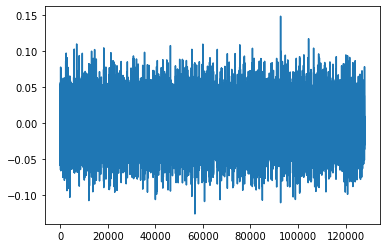

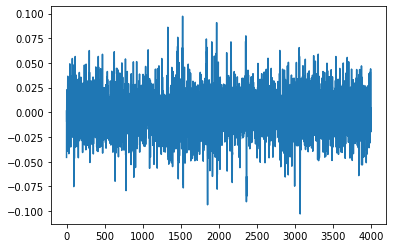

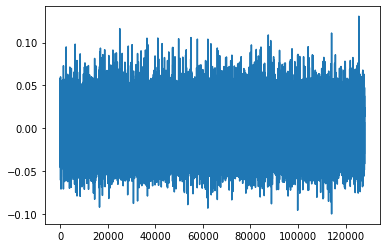

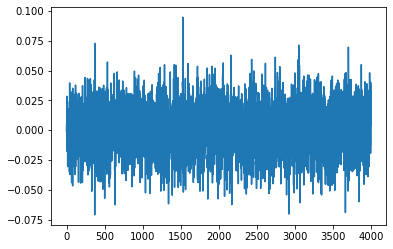

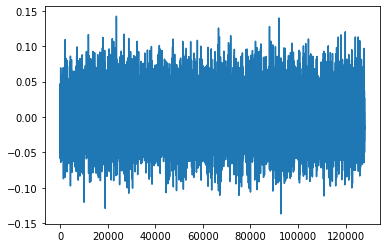

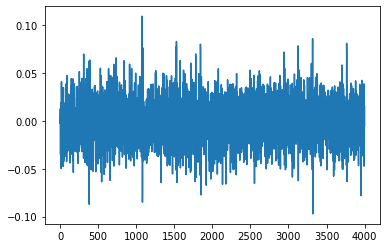

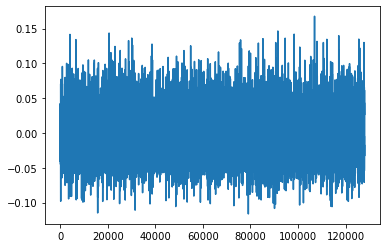

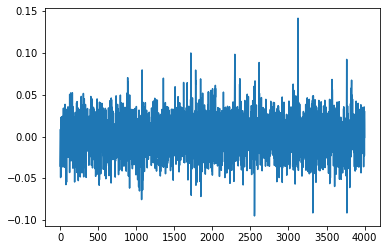

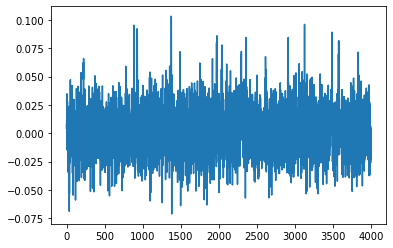

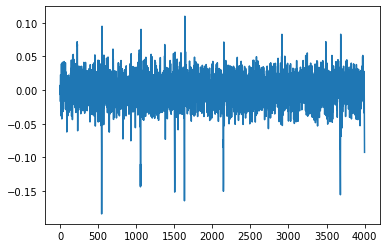

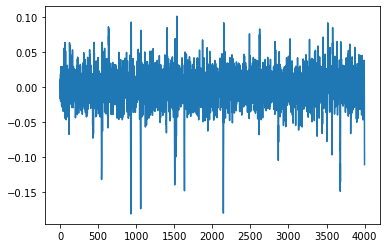

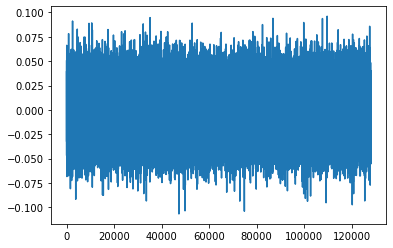

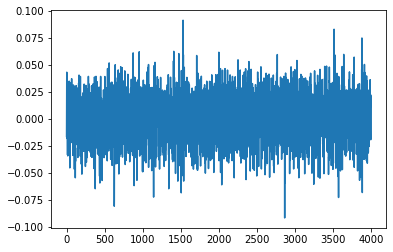

In [6]:
#### making other combinational channels

noise = np.random.normal(0, nvar,ch1.shape[1])
ch2n = (cell1_coef[1]*ch1) + noise # we dont have alpha here as they have been considered in main channels (ch1, ch4 and..)
fig, ax = plt.subplots()
ax.plot(ch2n[0,:])
fig, ax = plt.subplots()
ax.plot(ch2n[0,1000:5000])
plt.show()

noise = np.random.normal(0, nvar,ch1.shape[1])
ch3n = (cell1_coef[2] * ch1) + (cell2_coef[0] * ch4) + noise      
fig, ax = plt.subplots()
ax.plot(ch3n[0,:])
fig, ax = plt.subplots()
ax.plot(ch3n[0,1000:5000])
plt.show()

noise = np.random.normal(0, nvar,ch1.shape[1])
ch5n = (cell3_coef[0] * ch6) + (cell2_coef[2] * ch4) + noise      
fig, ax = plt.subplots()
ax.plot(ch5n[0,:])
fig, ax = plt.subplots()
ax.plot(ch5n[0,1000:5000])
plt.show()

noise = np.random.normal(0,nvar,ch1.shape[1])
ch7n = (cell3_coef[2] * ch6) + (cell4_coef[0] * ch8) + noise #(0.6*cell3_coef[2]*ch6)+(0.6*cell4_coef[0]*ch8)+noise      # I put these 0.6 since I got signals from ch 7 in main_code_mydata and I did not want them
#fek konam dalil 0.6 bala in bud ke dar 8 kanali cell akhar coefficientesh faghat az 2 channel miad va ehtemalan in etefagh baraie 16 channels dar channel akhar biofte
fig, ax = plt.subplots()
ax.plot(ch7n[0,:])
fig, ax = plt.subplots()
ax.plot(ch7n[0,1000:5000])
plt.show()

noise = np.random.normal(0,nvar,ch1.shape[1])
ch9n = (cell4_coef[2] * ch8) + (cell5_coef[0] * ch10) + noise 
ax.plot(ch9n[0,:])
fig, ax = plt.subplots()
ax.plot(ch9n[0,1000:5000])
plt.show()

noise = np.random.normal(0,nvar,ch1.shape[1])
ch11n = (cell5_coef[2] * ch10) + (cell6_coef[0] * ch12) + noise 
ax.plot(ch11n[0,:])
fig, ax = plt.subplots()
ax.plot(ch11n[0,1000:5000])
plt.show()

noise = np.random.normal(0,nvar,ch1.shape[1])
ch13n = (cell6_coef[2] * ch12) + (cell7_coef[0] * ch14) + noise 
ax.plot(ch13n[0,:])
fig, ax = plt.subplots()
ax.plot(ch13n[0,1000:5000])
plt.show()

noise = np.random.normal(0,nvar,ch1.shape[1])
ch15n = (0.6*cell7_coef[2] * ch14) + (0.6 * cell8_coef[0] * ch16) + noise 
fig, ax = plt.subplots()
ax.plot(ch15n[0,:])
fig, ax = plt.subplots()
ax.plot(ch15n[0,1000:5000])
plt.show()



In [7]:
### making the final multi-electrode array data

multi_Ch = np.zeros((16,ch1.shape[1]))
multi_Ch[0,:] = ch1n
multi_Ch[1,:] = ch2n
multi_Ch[2,:] = ch3n
multi_Ch[3,:] = ch4n
multi_Ch[4,:] = ch5n
multi_Ch[5,:] = ch6n
multi_Ch[6,:] = ch7n
multi_Ch[7,:] = ch8n
multi_Ch[8,:] = ch9n
multi_Ch[9,:] = ch10n
multi_Ch[10,:] = ch11n
multi_Ch[11,:] = ch12n
multi_Ch[12,:] = ch13n
multi_Ch[13,:] = ch14n
multi_Ch[14,:] = ch15n
multi_Ch[15,:] = ch16n

# plt.plot(ch1n[0,:])
# plt.show()



In [ ]:
path  =  '/Users/zm6112/Dropbox (Princeton)/PHD_paper & material/new code_use this for postdoc analysis/website_all_codes/data/synthetic data'

# np.save(path+ '/multi_16ch_usualdata', multi_Ch)
# np.save(path +'/multi_16ch_samecells', multi_Ch)
# np.save(path + '/multi_16ch_sametime', multi_Ch)


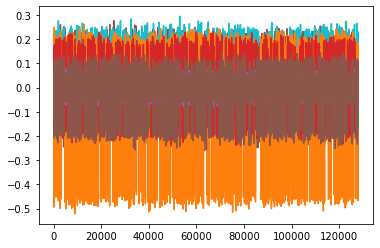

In [8]:
#plotting all channels data
for i in range(16):
    plt.plot(multi_Ch[i,:])
plt.show()